In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.resnet import preprocess_input
from keras.applications.resnet import decode_predictions
from keras.applications.resnet import ResNet50
from keras.models import Model
from pickle import dump

In [ ]:
import pandas as pd

painting_features = pd.read_csv('/content/drive/MyDrive/College/Sem 6/CV/Project/datasets/no_duplicate_painting_features.csv')

In [ ]:
painting_features

,art_style,painting,emotion
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else
1,Expressionism,wassily-kandinsky_study-for-autumn-1909,awe
2,Impressionism,konstantin-korovin_yaroslavna-s-lament-1909,awe
3,Impressionism,paul-gauguin_mette-gauguin-in-an-evening-dress...,awe
4,Impressionism,pericles-pantazis_still-life-with-quinces-1880,contentment
...,...,...,...
80026,Northern_Renaissance,pieter-bruegel-the-elder_go-ye-into-the-emmaus,awe
80027,Northern_Renaissance,albrecht-durer_the-small-chariot,awe
80028,Northern_Renaissance,albrecht-durer_sitting-mary-with-child,awe
80029,Northern_Renaissance,jan-van-hemessen_tobias-restores-his-father-s-...,sadness


In [ ]:
for i in range(8839, len(painting_features['art_style'])):
    image_path = f"/content/drive/MyDrive/College/Sem 6/CV/Project/wikiart/{painting_features['art_style'][i]}/{painting_features['painting'][i]}.jpg"
    image = load_img(image_path, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # load model
    model = ResNet50()
    # remove the output layer
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    # get extracted features
    features = model.predict(image)
    if i % 500 == 0:
      print(features.shape)
    # save to file
    dump(features, open(f'/content/drive/MyDrive/College/Sem 6/CV/Project/features/img{i}.pkl', 'wb'))

(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)


In [ ]:
painting_features_1000_subset = pd.read_csv('/content/drive/MyDrive/College/Sem 6/CV/Project/painting_features_1000_subset.csv')

In [ ]:
painting_features_1000_subset

,art_style,painting,emotion
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else
1,Expressionism,wassily-kandinsky_study-for-autumn-1909,awe
2,Impressionism,konstantin-korovin_yaroslavna-s-lament-1909,awe
3,Impressionism,paul-gauguin_mette-gauguin-in-an-evening-dress...,awe
4,Impressionism,pericles-pantazis_still-life-with-quinces-1880,contentment
...,...,...,...
995,Realism,vasily-vereshchagin_two-jews-1884,excitement
996,Realism,james-tissot_men-of-the-day-no-4-the-mob-rule-...,amusement
997,Impressionism,konstantin-korovin_on-the-square-1912,amusement
998,Post_Impressionism,vincent-van-gogh_zouave-sitting-whole-figure-1888,amusement


In [ ]:
image_features = []
for i in range(1000):
    image_features.append(f'img{i}.pkl')
painting_features_1000_subset['image_features'] = image_features

In [ ]:
import pickle
import numpy as np

X = []
for i in range(1000):
    with open(f'/content/drive/MyDrive/College/Sem 6/CV/Project/features/img{i}.pkl', 'rb') as f:
        data = pickle.load(f)
    X.append(data[0])

X = np.asarray(X)

In [ ]:
for i in range(2048):
    feature = []
    for j in range(1000):
        feature.append(X[j][i])
    painting_features_1000_subset[f'feature_{i}'] = feature

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


In [ ]:
painting_features_1000_subset

,art_style,painting,emotion,image_features,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_2038,feature_2039,feature_2040,feature_2041,feature_2042,feature_2043,feature_2044,feature_2045,feature_2046,feature_2047
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,img0.pkl,0.278422,0.527606,0.021193,1.104790,0.033097,0.149384,...,0.000000,0.093969,0.058464,2.601777,0.581423,0.006962,0.031829,0.876327,1.170455,0.284816
1,Expressionism,wassily-kandinsky_study-for-autumn-1909,awe,img1.pkl,0.106432,0.703795,0.000000,0.007888,0.015668,0.182670,...,2.416146,0.076510,0.146113,0.001664,2.098103,0.197032,0.151990,0.000000,0.468789,0.256748
2,Impressionism,konstantin-korovin_yaroslavna-s-lament-1909,awe,img2.pkl,0.151917,2.557872,0.826035,0.093906,0.009230,0.494370,...,0.090455,0.159610,0.043264,0.000000,0.699022,0.902977,0.122635,0.026057,0.000000,0.046566
3,Impressionism,paul-gauguin_mette-gauguin-in-an-evening-dress...,awe,img3.pkl,0.063078,1.351175,0.037122,0.448079,0.033715,0.117056,...,0.398210,0.008081,0.017637,0.506607,1.234004,0.122929,0.000000,0.145163,1.442093,0.533309
4,Impressionism,pericles-pantazis_still-life-with-quinces-1880,contentment,img4.pkl,2.203687,0.367822,0.976512,0.472500,0.302199,0.152941,...,0.000000,0.532532,2.082811,0.121080,0.320085,0.154419,0.874045,0.415222,3.152984,0.093512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Realism,vasily-vereshchagin_two-jews-1884,excitement,img995.pkl,0.017043,2.136101,0.044468,0.118175,0.509737,0.597605,...,0.013717,0.013687,0.136816,1.167259,0.830424,0.985465,2.046885,0.104100,1.999464,0.612785
996,Realism,james-tissot_men-of-the-day-no-4-the-mob-rule-...,amusement,img996.pkl,1.255179,0.000000,1.611124,0.055478,1.011541,0.078781,...,0.009497,0.412178,0.052310,0.950175,0.748959,0.479490,0.423200,0.713766,0.091844,2.059211
997,Impressionism,konstantin-korovin_on-the-square-1912,amusement,img997.pkl,0.000000,4.839285,0.158369,0.084149,0.087437,0.362394,...,0.011490,0.383353,0.883084,0.047050,0.021787,0.549750,0.062910,0.000000,1.550344,0.015552
998,Post_Impressionism,vincent-van-gogh_zouave-sitting-whole-figure-1888,amusement,img998.pkl,0.082224,1.892309,0.065868,0.180113,0.583887,0.154840,...,0.003239,0.000000,0.021489,2.335641,0.703628,0.880139,0.318111,2.336420,0.000000,0.000000


In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
painting_features_1000_subset['label']= label_encoder.fit_transform(painting_features_1000_subset['emotion'])

painting_features_1000_subset['label'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


array([8, 2, 3, 0, 7, 6, 5, 4, 1])

In [ ]:
painting_features_1000_subset['emotion'].unique()

array(['something else', 'awe', 'contentment', 'amusement', 'sadness',
       'fear', 'excitement', 'disgust', 'anger'], dtype=object)

In [ ]:
painting_features_1000_subset.to_csv('/content/drive/MyDrive/College/Sem 6/CV/Project/features_1000_subset.csv')

In [ ]:
X

array([[0.2784216 , 0.527606  , 0.02119292, ..., 0.8763272 , 1.1704551 ,
        0.28481564],
       [0.10643183, 0.7037948 , 0.        , ..., 0.        , 0.46878865,
        0.2567478 ],
       [0.15191746, 2.557872  , 0.826035  , ..., 0.02605702, 0.        ,
        0.0465658 ],
       ...,
       [0.        , 4.839285  , 0.15836889, ..., 0.        , 1.5503438 ,
        0.01555244],
       [0.08222382, 1.8923091 , 0.06586791, ..., 2.3364198 , 0.        ,
        0.        ],
       [0.01687362, 0.68755996, 0.5691797 , ..., 0.06395859, 1.3096694 ,
        0.81121606]], dtype=float32)

In [ ]:
y = painting_features_1000_subset['label']
y

0      8
1      2
2      2
3      2
4      3
      ..
995    5
996    0
997    0
998    0
999    3
Name: label, Length: 1000, dtype: int64

# **Stratified train test split**

In [ ]:
test_dataset = painting_features_1000_subset.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=0.2))

In [ ]:
test_dataset

,art_style,painting,emotion,image_features,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_2039,feature_2040,feature_2041,feature_2042,feature_2043,feature_2044,feature_2045,feature_2046,feature_2047,label
245,Impressionism,joaquã­n-sorolla_pulling-the-boat-1916,amusement,img245.pkl,0.166044,2.197955,1.023054,1.235119,0.000000,0.437646,...,0.363186,0.051580,0.642920,0.352508,1.595905,0.000000,0.041211,0.994471,1.036317,0
251,Realism,thomas-eakins_photograph-1910-19,amusement,img251.pkl,0.456372,0.277109,0.533297,0.089471,1.683744,0.282309,...,0.217372,0.292344,0.782890,0.270933,1.421841,0.000000,0.180432,0.028785,0.048267,0
516,Impressionism,william-merritt-chase_long-island-landscape-af...,amusement,img516.pkl,0.152622,0.032002,0.287799,0.000000,0.004655,0.246127,...,0.471001,0.394759,0.004864,0.832902,0.283388,0.137584,0.056295,0.130895,0.118189,0
486,Northern_Renaissance,hugo-van-der-goes_portinari-triptych-detail-1478,amusement,img486.pkl,1.158494,1.033744,0.078254,0.541306,0.269185,0.114427,...,0.012790,0.012287,3.463528,0.223222,0.148459,1.398204,0.171793,1.836089,0.182203,0
457,Romanticism,orest-kiprensky_portrait-of-the-abbot-skarpell...,amusement,img457.pkl,0.080189,2.324681,0.000000,0.268366,0.129128,0.000000,...,0.000000,0.665128,8.395813,0.651509,0.000000,0.603657,0.213957,0.000000,0.348410,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,Northern_Renaissance,albrecht-durer_st-paul,something else,img813.pkl,0.092874,0.309151,1.051254,0.442404,0.634865,0.138964,...,0.000000,0.000000,0.787677,0.610717,1.801702,0.132479,0.154987,1.102277,0.116004,8
825,Impressionism,joaquã­n-sorolla_the-beach-at-biarritz-1906,something else,img825.pkl,0.057224,2.081779,0.365008,0.000000,0.096517,0.000000,...,0.001220,0.053152,0.167914,0.203468,0.685938,0.076232,0.231343,0.911162,0.005268,8
47,Realism,vincent-van-gogh_woman-mending-stockings-1881,something else,img47.pkl,0.612480,0.235132,0.000000,0.421110,0.776868,0.000000,...,0.024271,0.005451,5.641107,1.130129,0.880607,0.120828,0.036784,0.159306,0.905283,8
290,Impressionism,konstantin-korovin_paris-cafe-de-la-paix-1906,something else,img290.pkl,0.404573,0.550946,0.000000,0.000000,0.028533,0.318469,...,0.017207,0.203184,0.190020,0.038150,0.462343,0.035897,0.030622,0.339621,0.000000,8


In [ ]:
train_dataset = pd.DataFrame(columns=list(painting_features_1000_subset.columns))
train_dataset

,art_style,painting,emotion,image_features,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_2039,feature_2040,feature_2041,feature_2042,feature_2043,feature_2044,feature_2045,feature_2046,feature_2047,label


In [ ]:
for i in range(0, len(painting_features_1000_subset['painting'])):
    if painting_features_1000_subset.iloc[i]['painting'] not in list(test_dataset['painting']):
      train_dataset.loc[len(train_dataset)] = [painting_features_1000_subset.iloc[i][col] for col in list(painting_features_1000_subset.columns)]

In [ ]:
train_dataset.to_csv('/content/drive/MyDrive/College/Sem 6/CV/Project/datasets/train_dataset_1000.csv')

In [ ]:
test_dataset.to_csv('/content/drive/MyDrive/College/Sem 6/CV/Project/datasets/test_dataset_1000.csv')

In [ ]:
X_train = train_dataset[train_dataset.columns[4:2052]]
y_train = train_dataset['label']

In [ ]:
X_train = np.array(X_train)
y_train = np.array([int(x) for x in y_train])

In [ ]:
X_test = test_dataset[test_dataset.columns[4:2052]]
y_test = test_dataset['label']

In [ ]:
X_test = np.array(X_test)
y_test = np.array([int(x) for x in y_test])

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(X, y, X_test, k):
    neigh = KNeighborsClassifier(n_neighbors = k)
    neigh.fit(X, y)
    y_pred = neigh.predict(X_test)
    return y_pred

In [ ]:
from sklearn.metrics import accuracy_score

def calc_accuracy_sklearn(k, X, y, X_test, y_test):
    y_pred = KNN(X, y, X_test, k)
    return accuracy_score(y_test, y_pred)

In [ ]:
#K = 1
calc_accuracy_sklearn(1, X_train, y_train, X_test, y_test)

0.245

In [ ]:
#K = 3
calc_accuracy_sklearn(3, X_train, y_train, X_test, y_test)

0.285

In [ ]:
#K = 5
calc_accuracy_sklearn(5, X_train, y_train, X_test, y_test)

0.27

In [ ]:
#K = 7
calc_accuracy_sklearn(7, X_train, y_train, X_test, y_test)

0.305

In [ ]:
#K = 9
calc_accuracy_sklearn(9, X_train, y_train, X_test, y_test)

0.32

In [ ]:
k_list = [k for k in range(1, 52, 2)]

In [ ]:
accuracies_artemis_sklearn = [calc_accuracy_sklearn(k, X_train, y_train, X_test, y_test) for k in k_list]

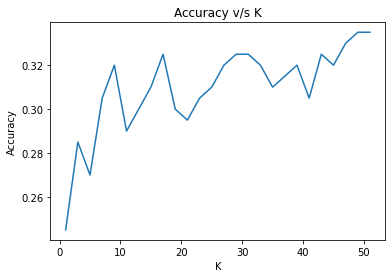

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k_list, accuracies_artemis_sklearn)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy v/s K')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [1,3,5,7], 
              'metric': ['euclidean', 'manhattan']}
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(X_train, y_train)
print("Tuned KNN Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_))

Tuned KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 7}
Best score is 0.26875


In [ ]:
knn_best = KNeighborsClassifier(n_neighbors = 7, metric = 'manhattan')
knn_best.fit(X_train, y_train)
y_pred_k_7 = knn_best.predict(X_test)


In [ ]:
# Displaying precision, recall and F1 score for each class
from sklearn.metrics import classification_report 

report_knn = classification_report(y_test, y_pred_k_7)
report_knn_dict = classification_report(y_test, y_pred_k_7, output_dict = True)
print(report_knn)

              precision    recall  f1-score   support

           0       0.11      0.09      0.10        22
           1       0.00      0.00      0.00         1
           2       0.29      0.42      0.34        43
           3       0.38      0.58      0.46        66
           4       0.00      0.00      0.00         8
           5       0.20      0.08      0.11        13
           6       0.25      0.11      0.15        18
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00         6

    accuracy                           0.30       200
   macro avg       0.14      0.14      0.13       200
weighted avg       0.24      0.30      0.26       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Function to get a list of values of a performance metric corresponding to each class 
# Possible performance metrics: precision, recall and f1_score

def get_performance_from_classification_report(report, performance_metric):
  performance = []
  for class_id in range(9):
    class_id = str(class_id)
    performance.append(round(report[class_id][performance_metric], 2))
  return performance

In [ ]:
# Storing the class-wise values of performance metrics which will be needed to draw the bar plot

precision = get_performance_from_classification_report(report_knn_dict, 'precision')
recall =  get_performance_from_classification_report(report_knn_dict, 'recall')
f1_score = get_performance_from_classification_report(report_knn_dict, 'f1-score')

In [ ]:
print(precision)
print(recall)
print(f1_score)

[0.2, 0.0, 0.2, 0.34, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.05, 0.0, 0.12, 0.85, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.07, 0.0, 0.15, 0.48, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
classes = painting_features_1000_subset['emotion'].unique()

In [ ]:
# Function to plot performance bar plot to show classification report graphically

import numpy as np
import matplotlib.pyplot as plt

def draw_performance_plot(precision, recall, f1_score, model_name): 
	barWidth = 0.25
	fig = plt.subplots(figsize =(12, 8))
 
	br1 = np.arange(9)
	br2 = [x + barWidth for x in br1]
	br3 = [x + barWidth for x in br2]

	plt.bar(br1, precision, color ='mediumaquamarine', width = barWidth,
			edgecolor ='grey', label ='Precision')
	plt.bar(br2, recall, color ='palegreen', width = barWidth,
			edgecolor ='grey', label ='Recall')
	plt.bar(br3, f1_score, color ='moccasin', width = barWidth,
			edgecolor ='grey', label ='F1 Score')

	plt.title(f'Performance of {model_name} on Artemis', fontweight ='bold', fontsize = 20)
	plt.ylabel('Performance', fontweight ='bold', fontsize = 15)
	plt.xlabel('Classes', fontweight ='bold', fontsize = 15)
	plt.xticks([r + barWidth for r in range(9)], classes)

	plt.legend()
	plt.show()

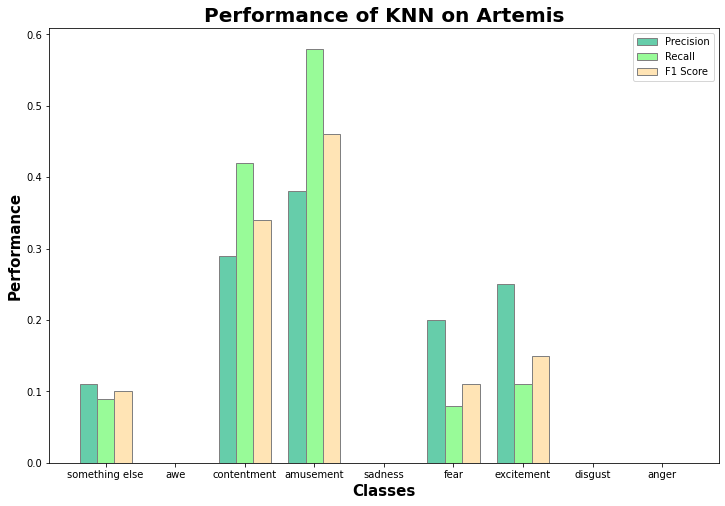

In [ ]:
draw_performance_plot(precision, recall, f1_score, 'KNN')

## **Function to plot learning curves**

In [ ]:
from matplotlib import pyplot

def summarize_model(history):
	# plot loss during training
  pyplot.figure(figsize=(8,6))
  pyplot.subplot(211)
  pyplot.title('Loss')
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='validation')
  pyplot.legend()
  # plot accuracy during training
  pyplot.subplot(212)
  pyplot.title('Accuracy')
  pyplot.plot(history.history['accuracy'], label='train')
  pyplot.plot(history.history['val_accuracy'], label='validation')
  pyplot.legend()
  pyplot.show()

# **Neural Networks**

In [ ]:
# Converting y_train and y_test to one-hot vectors before feeding it to the neural network
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 9)
y_test = to_categorical(y_test, 9)

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Creating the Neural Network Model
NN = Sequential()
NN.add(Dense(50, activation = 'relu',  input_shape=(2048,)))
NN.add(Dense(55, activation = 'relu'))
NN.add(Dense(60, activation = 'relu'))
NN.add(Dense(60, activation = 'relu'))
NN.add(Dense(60, activation = 'relu'))
NN.add(Dense(60, activation = 'relu'))
NN.add(Dense(9, activation = 'softmax'))
NN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 50)                102450    
                                                                 
 dense_29 (Dense)            (None, 55)                2805      
                                                                 
 dense_30 (Dense)            (None, 60)                3360      
                                                                 
 dense_31 (Dense)            (None, 60)                3660      
                                                                 
 dense_32 (Dense)            (None, 60)                3660      
                                                                 
 dense_33 (Dense)            (None, 60)                3660      
                                                                 
 dense_34 (Dense)            (None, 9)                

In [ ]:
# Compiling the neural network model
NN.compile(loss='categorical_crossentropy',
              optimizer= Adam(learning_rate = 0.0001),
              metrics=['accuracy'])

In [ ]:
# Training the complex neural network model on the training data with 10 epochs,
# using 20% of the training data for validation
history_NN_10 = NN.fit(X_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
20/20 [==============================] - 1s 19ms/step - loss: 2.2024 - accuracy: 0.0781 - val_loss: 2.1503 - val_accuracy: 0.0812
Epoch 2/10
20/20 [==============================] - 0s 6ms/step - loss: 2.0982 - accuracy: 0.2375 - val_loss: 2.0307 - val_accuracy: 0.3625
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 1.9913 - accuracy: 0.3156 - val_loss: 1.8977 - val_accuracy: 0.3812
Epoch 4/10
20/20 [==============================] - 0s 6ms/step - loss: 1.9080 - accuracy: 0.3156 - val_loss: 1.8306 - val_accuracy: 0.3812
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: 1.8569 - accuracy: 0.3156 - val_loss: 1.8023 - val_accuracy: 0.3812
Epoch 6/10
20/20 [==============================] - 0s 6ms/step - loss: 1.8180 - accuracy: 0.3187 - val_loss: 1.7891 - val_accuracy: 0.3750
Epoch 7/10
20/20 [==============================] - 0s 6ms/step - loss: 1.7859 - accuracy: 0.3359 - val_loss: 1.7668 - val_accuracy: 0.3750
Epoch 8/10
20/20 [=

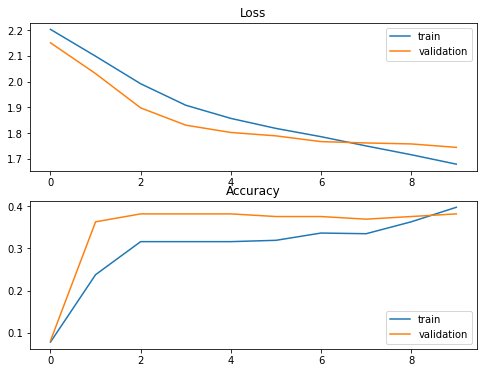

In [ ]:
# Learning curve for the model

summarize_model(history_NN_10)

In [ ]:
# Evaluating the trained NN model on the test data
testLoss_NN, testAccuracy_NN = NN.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 1.8210 - accuracy: 0.3250


The test average accuracy is 32.50%

In [ ]:
# Using the NN model to make predictions
y_pred = NN.predict(X_test)

In [ ]:
import numpy as np 
# Converting the predicted classes and actual classes vectors to get the predicted and actual classes
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true_classes = np.argmax(y_test,axis = 1)

**Output precision, recall, F1-score for each class**

In [ ]:
# Classification Report
from sklearn.metrics import classification_report 

report_NN_dict = classification_report(y_true_classes, y_pred_classes, output_dict = True)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.29      0.09      0.14        22
           1       0.00      0.00      0.00         1
           2       0.11      0.02      0.04        43
           3       0.34      0.94      0.50        66
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00         6

    accuracy                           0.33       200
   macro avg       0.08      0.12      0.07       200
weighted avg       0.17      0.33      0.19       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Storing the class-wise values of performance metrics which will be needed to draw the bar plot

precision = get_performance_from_classification_report(report_NN_dict, 'precision')
recall =  get_performance_from_classification_report(report_NN_dict, 'recall')
f1_score = get_performance_from_classification_report(report_NN_dict, 'f1-score')

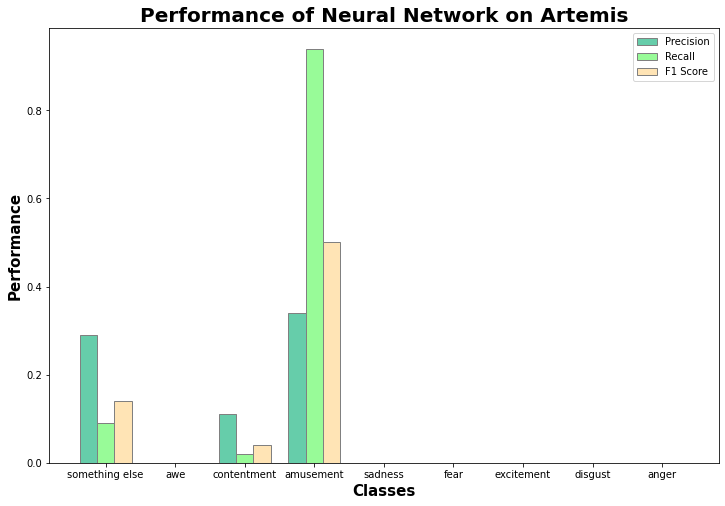

In [ ]:
# Displaying classification report as a bar plot
draw_performance_plot(precision, recall, f1_score, 'Neural Network')

In [ ]:
# Training the complex neural network model on the training data with 10 epochs,
# using 20% of the training data for validation
history_NN_20 = NN.fit(X_train, y_train, epochs = 20, validation_split = 0.2)

Epoch 1/20
20/20 [==============================] - 2s 26ms/step - loss: 2.2145 - accuracy: 0.0891 - val_loss: 2.1507 - val_accuracy: 0.2125
Epoch 2/20
20/20 [==============================] - 0s 9ms/step - loss: 2.1220 - accuracy: 0.2656 - val_loss: 2.0399 - val_accuracy: 0.3750
Epoch 3/20
20/20 [==============================] - 0s 9ms/step - loss: 2.0152 - accuracy: 0.3156 - val_loss: 1.9007 - val_accuracy: 0.3812
Epoch 4/20
20/20 [==============================] - 0s 9ms/step - loss: 1.9283 - accuracy: 0.3156 - val_loss: 1.8272 - val_accuracy: 0.3812
Epoch 5/20
20/20 [==============================] - 0s 11ms/step - loss: 1.8783 - accuracy: 0.3156 - val_loss: 1.8009 - val_accuracy: 0.3812
Epoch 6/20
20/20 [==============================] - 0s 9ms/step - loss: 1.8497 - accuracy: 0.3156 - val_loss: 1.7851 - val_accuracy: 0.3812
Epoch 7/20
20/20 [==============================] - 0s 9ms/step - loss: 1.8242 - accuracy: 0.3234 - val_loss: 1.7741 - val_accuracy: 0.3750
Epoch 8/20
20/20 [

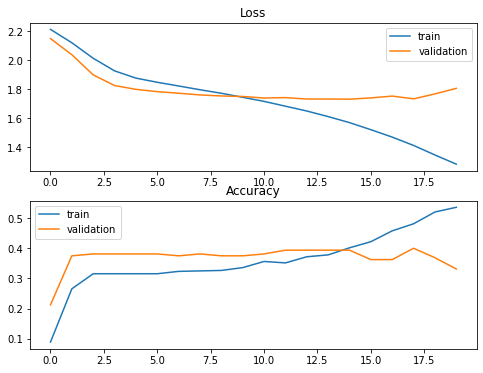

In [ ]:
# Learning curve for the model

summarize_model(history_NN_20)

In [ ]:
# Evaluating the trained NN model on the test data
testLoss_NN, testAccuracy_NN = NN.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 1.8713 - accuracy: 0.3300


The test average accuracy is 33.00%. Hence, it shows a minor improvement.

In [ ]:
# Using the NN model to make predictions
y_pred = NN.predict(X_test)

In [ ]:
import numpy as np 
# Converting the predicted classes and actual classes vectors to get the predicted and actual classes
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true_classes = np.argmax(y_test,axis = 1)

**Output precision, recall, F1-score for each class**

In [ ]:
# Classification Report

report_NN_dict = classification_report(y_true_classes, y_pred_classes, output_dict = True)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.25      0.05      0.08        22
           1       0.00      0.00      0.00         1
           2       0.22      0.30      0.25        43
           3       0.39      0.76      0.52        66
           4       0.00      0.00      0.00         8
           5       0.50      0.08      0.13        13
           6       0.17      0.06      0.08        18
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00         6

    accuracy                           0.33       200
   macro avg       0.17      0.14      0.12       200
weighted avg       0.25      0.33      0.25       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Storing the class-wise values of performance metrics which will be needed to draw the bar plot

precision = get_performance_from_classification_report(report_NN_dict, 'precision')
recall =  get_performance_from_classification_report(report_NN_dict, 'recall')
f1_score = get_performance_from_classification_report(report_NN_dict, 'f1-score')

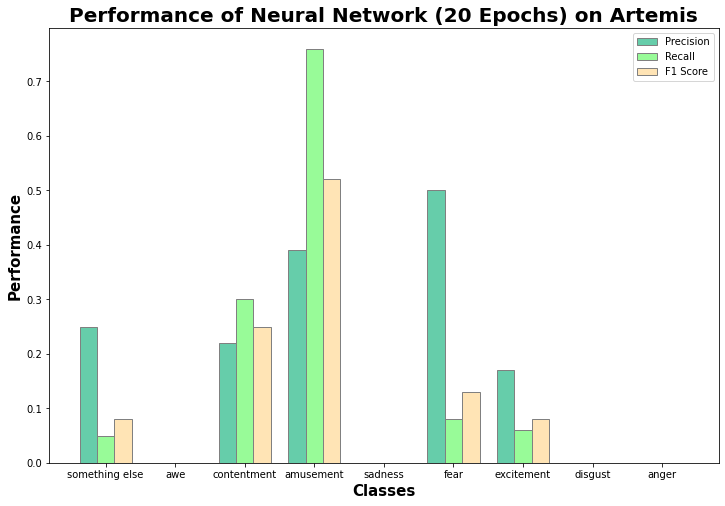

In [ ]:
# Displaying classification report as a bar plot
draw_performance_plot(precision, recall, f1_score, 'Neural Network (20 Epochs)')